Import das bibliotecas

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import plotly.express as px

Leitura dos arquivos csv

In [59]:
df1 = pd.read_csv(('CONTRATOS.CSV'), sep=';', encoding='latin-1')
df2 = pd.read_csv('ITENS_CONTRATOS.CSV', sep=';', encoding='latin-1', low_memory=False)

Integração das tabelas

In [60]:
tabela_integrada = pd.merge(df1, df2, on='Contratação', how='inner')

Conversao e criação de gráfico de pizza

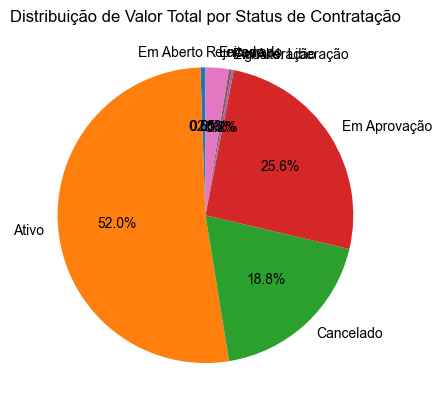

In [61]:
# Limpar e converter a coluna para números
tabela_integrada['Valor Total Contrato/Valor Estimado para Contratação (R$)'] = tabela_integrada['Valor Total Contrato/Valor Estimado para Contratação (R$)'].str.replace(',', '.').astype(float)

# Criar um gráfico de pizza
plt.pie(tabela_integrada.groupby('Status Contratação')['Valor Total Contrato/Valor Estimado para Contratação (R$)'].sum(), labels=tabela_integrada['Status Contratação'].unique(), autopct='%1.1f%%', startangle=90)

# Adicionar título ao gráfico
plt.title('Distribuição de Valor Total por Status de Contratação')

# Exibir o gráfico
plt.show()


Criação de gráfico Treemap

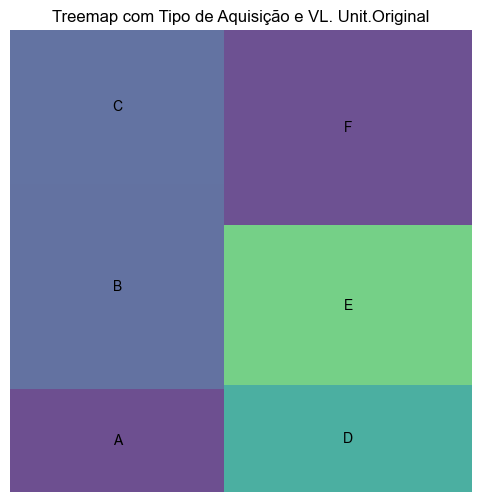

In [63]:

data1 = {'Tipo de Aquisição': ['A', 'B', 'C'], 'VL. Unit.Original': [100, 200, 150]}
data2 = {'Tipo de Aquisição': ['D', 'E', 'F'], 'VL. Unit.Original': [120, 180, 220]}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Combine os DataFrames
tabelas_combinadas = pd.concat([df1, df2])

# Crie o Treemap
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, aspect="equal")

squarify.plot(
    sizes=tabelas_combinadas['VL. Unit.Original'],
    label=tabelas_combinadas['Tipo de Aquisição'],
    alpha=0.8,
)

plt.title("Treemap com Tipo de Aquisição e VL. Unit.Original")
plt.axis("off")
plt.show()


Criação de grafico Treemap em html

In [56]:
import plotly.offline as pyo

# Crie o Treemap com plotly
fig = px.treemap(final_dataframe, path=['Tipo de Aquisição'], values='VL. Unit.Original')

# Salve o gráfico como um arquivo HTML
pyo.plot(fig, filename='treemap.html')

'treemap.html'